<a href="https://colab.research.google.com/github/MUZAMMILPERVAIZ/Stable-Diffusion-Logo-Generator/blob/main/Stable_Diffusion_FIne_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nvidia-smi

Tue Jul  4 09:12:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    47W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Requirements

In [3]:
!pip install transformers datasets
!pip install huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 22.4 MB/s eta 0:00:00


In [4]:
!git clone https://github.com/huggingface/diffusers
%cd diffusers
%pip install .

Cloning into 'diffusers'...
remote: Enumerating objects: 29458, done.
remote: Counting objects: 100% (975/975), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 29458 (delta 666), reused 758 (delta 501), pack-reused 28483
Receiving objects: 100% (29458/29458), 19.28 MiB | 11.56 MiB/s, done.
Resolving deltas: 100% (21494/21494), done.
/content/diffusers
Processing /content/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.18.0.dev0-py3-none-any.whl size=1137314 sha256=c233ed0e0ddbb746245bfa0a2b1203e02adb2bf6f3e33757981520016231a626
  Stored in directory: /tmp/pip-ephem-wheel-cache-5t544z0j/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers


In [5]:
%cd examples/text_to_image
%pip install -r requirements.txt

/content/diffusers/examples/text_to_image
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 8.4 MB/s eta 0:00:00


In [6]:
!accelerate config default --mixed_precision fp16

2023-07-04 09:13:12.531357: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [7]:
from huggingface_hub import notebook_login
notebook_login()

In [19]:
import os
# os.environ['MODEL_NAME'] = f'CompVis/stable-diffusion-v1-4'
os.environ['MODEL_NAME'] = f'logo-designer-stable-diffusion-v1.4'

os.environ['dataset_name'] = f'logo-wizard/modern-logo-dataset'
os.environ['output_dir'] = f'/content/drive/MyDrive/stable-diffusion-v1.4'

In [20]:
!accelerate launch  train_text_to_image.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --dataset_name=$dataset_name \
  --use_ema \
  --resolution=512 --center_crop --random_flip \
  --train_batch_size=2 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --max_train_steps=100 \
  --learning_rate=1e-05 \
  --max_grad_norm=1 \
  --lr_scheduler="constant" --lr_warmup_steps=0 \
  --output_dir=$output_dir


2023-07-04 10:16:39.826586: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-04 10:16:44.244891: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
07/04/2023 10:16:46 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

{'sample_max_value', 'dynamic_thresholding_ratio', 'variance_type', 'thresholding', 'clip_sample_range'} was not found in config. Values will be initialized to default values.
07/04/2023 10:16:55 - WARNING - datasets.builder - Found cached dataset parquet (/root/.cache/huggingface/datasets/logo-wizard___parquet/logo-wizard--modern-logo-dataset-ae3918239c4e55f4/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7)
100% 1/1 [00:00<00:00, 766.22it/s]
07/04/2023 10:17:01 - INFO - __main__ - ***** Running training *****
07/04/2023 10:17:01 - INFO - __main__ -   Num 

In [24]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

model_path = "/content/drive/MyDrive/stable-diffusion-v1.4"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")




StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.18.0.dev0",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

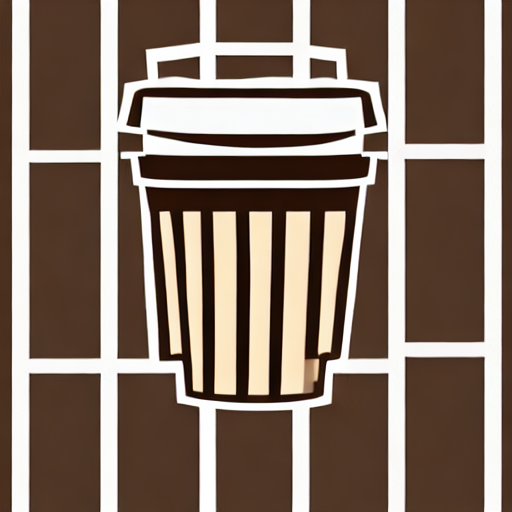

In [26]:
prompt = "a logo of coffee shop, take-away coffee cardboard glass with white and brown stripes and dark brown lid, coffee circle with three cream drops, white background, brown foreground, minimalism, modern"

image = pipe(prompt=prompt).images[0]
image.save("logo-1.png")

img = Image.open("logo-1.png")
img.show()


  0%|          | 0/50 [00:00<?, ?it/s]

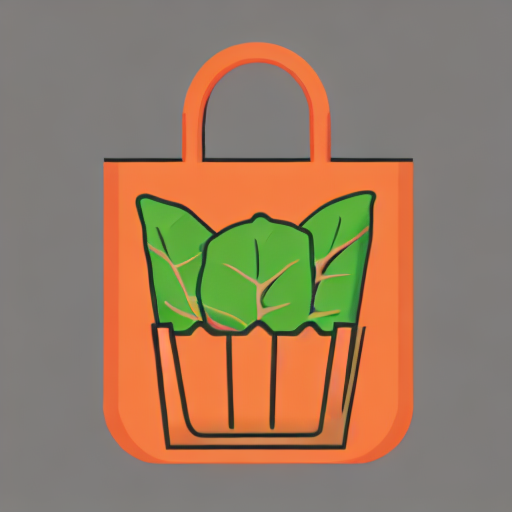

In [27]:
prompt = "a logo of cafe restaurant bar with a bag and shawarma with lettuce inside it, linen background, tomato, salmon foreground, minimalism, modern"

image = pipe(prompt=prompt).images[0]
image.save("logo-1.png")

img = Image.open("logo-1.png")
img.show()


  0%|          | 0/50 [00:00<?, ?it/s]

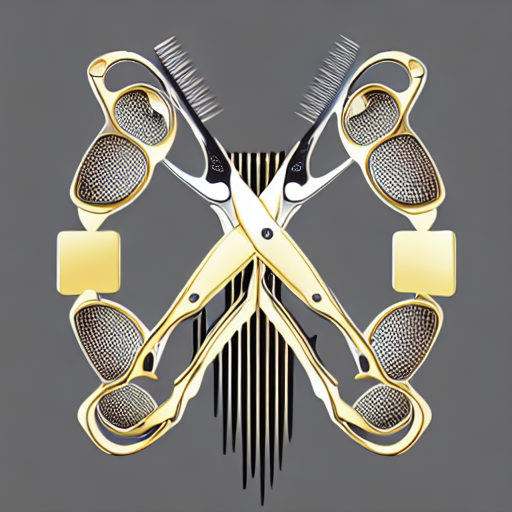

In [28]:
prompt = "a logo of barbershop hair salon, The intersection of scissors and combs in the center of the image., white background, gold foreground, minimalism, modern"

image = pipe(prompt=prompt).images[0]
image.save("logo-1.png")

img = Image.open("logo-1.png")
img.show()


# FLASK API

In [29]:
from flask import Flask, request, send_file
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import io

app = Flask(__name__)

model_path = "/content/drive/MyDrive/stable-diffusion-v1.4"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

@app.route('/generate', methods=['POST'])
def generate():
    prompt = request.json['prompt']
    image = pipe(prompt=prompt).images[0]

    img_io = io.BytesIO()
    image.save(img_io, 'PNG', quality=100)
    img_io.seek(0)

    return send_file(img_io, mimetype='image/png')

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


# Request

In [ ]:
import requests
from PIL import Image
import io
import matplotlib.pyplot as plt

while True:
    prompt = input("Enter your prompt (or 'exit' to stop): ")
    if prompt.lower() == 'exit':
        break

    response = requests.post('http://localhost:5000/generate', json={'prompt': prompt})

    img = Image.open(io.BytesIO(response.content))

    plt.imshow(img)
    plt.axis('off')
    plt.show()
